In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
masses = np.loadtxt('BallMasses.txt')
freqs = np.load('draw_freq_total_70_rounds.npy') 
#freqs = np.loadtxt('draw_freq_bw_total.txt')

N=75

In [3]:
print(masses)
print(np.sum(freqs))

[2.9 3.7 3.8 3.  3.6 3.6 3.7 3.8 3.3 3.6 3.2 3.2 3.8 3.3 3.9 3.4 3.4 3.1
 3.3 3.6 3.3 3.3 3.7 3.9 3.5 4.  3.5 3.8 2.8 2.6 3.3 3.3 3.4 3.6 3.2 3.3
 3.6 3.3 3.2 3.4 3.2 3.8 3.4 3.1 3.5 3.2 2.9 3.1 3.5 3.5 3.8 3.  2.9 3.5
 3.1 3.7 3.  3.2 3.2 3.3 4.1 3.3 3.5 3.9 3.3 3.6 3.4 2.9 3.7 3.3 3.6 3.5
 3.2 3.6 2.9]
1369.0


2.9

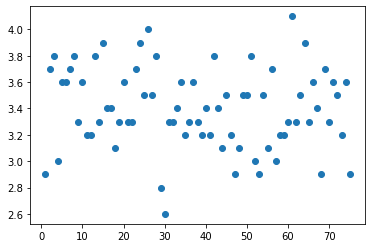

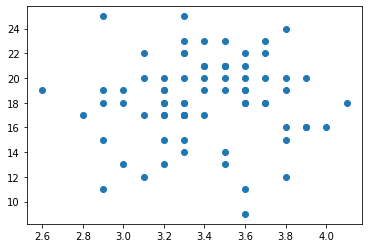

In [4]:
j_grid = np.linspace(1, 75, 75)
fig, ax = plt.subplots()
ax.scatter(j_grid, masses)

fig, ax = plt.subplots()
ax.scatter(masses, freqs)

masses[0]

In [5]:
def p(j, theta):
    unnormalised_p = lambda j,theta: masses[j]**theta
    A = 0
    for i in range(N):
        A += unnormalised_p(i,theta)
    return unnormalised_p(j, theta)/A

def log_likelihood(freqs, theta):
    logL = 0
    for j in range(N):
        logL += freqs[j]*np.log(p(j, theta))
    return logL

def nll(theta, freqs):
    return -log_likelihood(freqs, theta)


[0.08894354]


Text(0, 0.5, 'log likelihood')

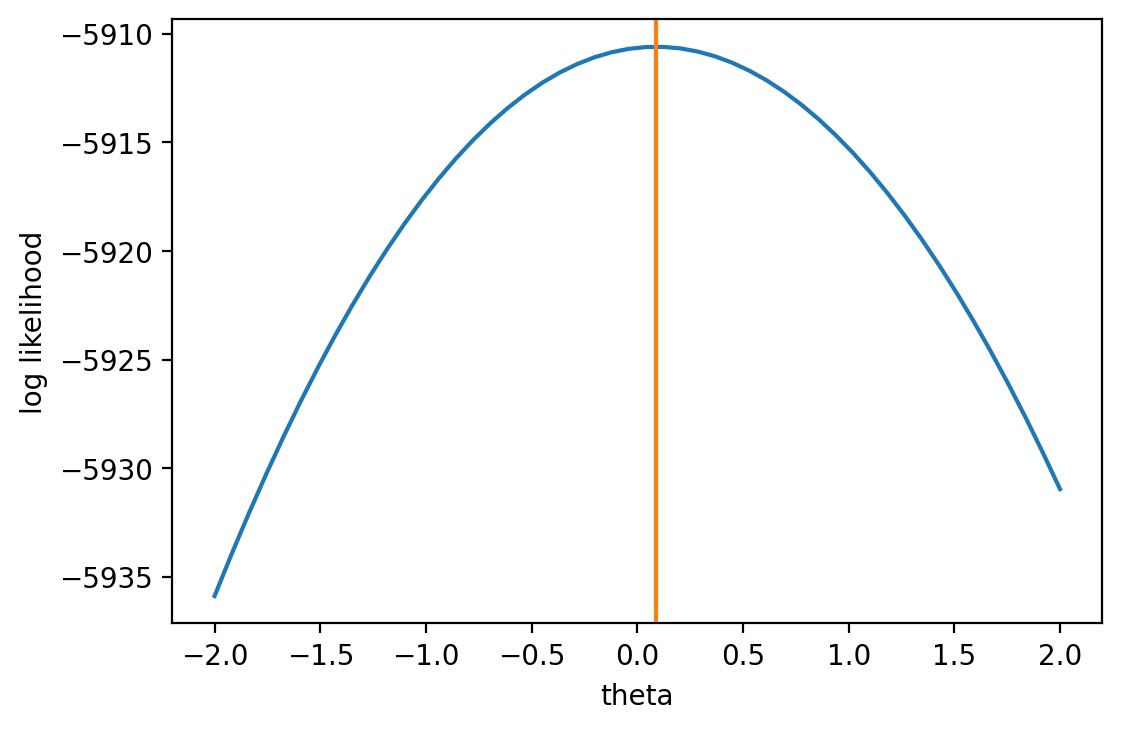

In [6]:
theta = np.linspace(-2,2)

res = scipy.optimize.minimize(nll, 0, freqs)

print(res.x)

fig, ax = plt.subplots(dpi=200)
ax.plot(theta, log_likelihood(freqs, theta))
ax.axvline(res.x, color ='C1')
ax.set_xlabel('theta')
ax.set_ylabel('log likelihood')

In [7]:
#run game

def runGame(theta):
    balls = np.arange(N)
    for i in range(3):
        cumulative_p = np.cumsum(p(balls, theta))
        r = np.random.uniform()
        index = np.arange(len(balls))[cumulative_p>r]
        print(cumulative_p)
        
        np.delete(balls, index)
        
runGame(0)


[0.01333333 0.02666667 0.04       0.05333333 0.06666667 0.08
 0.09333333 0.10666667 0.12       0.13333333 0.14666667 0.16
 0.17333333 0.18666667 0.2        0.21333333 0.22666667 0.24
 0.25333333 0.26666667 0.28       0.29333333 0.30666667 0.32
 0.33333333 0.34666667 0.36       0.37333333 0.38666667 0.4
 0.41333333 0.42666667 0.44       0.45333333 0.46666667 0.48
 0.49333333 0.50666667 0.52       0.53333333 0.54666667 0.56
 0.57333333 0.58666667 0.6        0.61333333 0.62666667 0.64
 0.65333333 0.66666667 0.68       0.69333333 0.70666667 0.72
 0.73333333 0.74666667 0.76       0.77333333 0.78666667 0.8
 0.81333333 0.82666667 0.84       0.85333333 0.86666667 0.88
 0.89333333 0.90666667 0.92       0.93333333 0.94666667 0.96
 0.97333333 0.98666667 1.        ]
[0.01333333 0.02666667 0.04       0.05333333 0.06666667 0.08
 0.09333333 0.10666667 0.12       0.13333333 0.14666667 0.16
 0.17333333 0.18666667 0.2        0.21333333 0.22666667 0.24
 0.25333333 0.26666667 0.28       0.29333333 0.30666